<h1>국내 여행 로그 데이터(서부권) (2023)</h1>
<h2>[분석 과정 - XGBClassifier]</h2>
<ul>
<li>데이터 정보 및 전처리 과정은 data_preprocessing.ipynb 참고</li></ul>

<hr>
<h2>[패키지 및 데이터 로드]</h2>

In [2]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 
from xgboost import XGBClassifier
from xgboost import cv, DMatrix, train
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 숫자 표기 설정
pd.options.display.float_format = '{:,.2f}'.format # 지수 없이 숫자로
#pd.reset_option('display.float_format') # 지수표기법

# 출력 설정 변경 (None : 모든 행,열 출력)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
#pd.reset_option('all') # 설정 변경 초기화 

In [3]:
# 데이터 로드
train_data = pd.read_csv('data/training/merged_data/no_map_merge.csv', encoding='UTF-8')
test_data = pd.read_csv('data/validation/merged_data/no_map_merge_validation.csv', encoding='UTF-8')

In [4]:
print(train_data.isnull().sum())

GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
REL_CD                       0
COMPANION_GENDER             0
COMPANION_AGE_GRP            0
TRAVEL_PURPOSE               0
TRAVEL_START_YMD             0
TRAVEL_END_YMD               0
TRAVEL_MISSION_CHECK         0
TOTAL_MVMN_WON               0
ACTIVITY_TYPE_CD             0
TOTAL_ACTIVITY_WON           0
TOTAL_WON                    0
TRAVEL_D

In [5]:
print(test_data.isnull().sum())

GENDER                       0
AGE_GRP                      0
JOB_NM                       0
TRAVEL_TERM                  0
TRAVEL_LIKE_SGG_1            0
TRAVEL_LIKE_SGG_2            0
TRAVEL_LIKE_SGG_3            0
TRAVEL_STYL_1                0
TRAVEL_STYL_2                0
TRAVEL_STYL_3                0
TRAVEL_STYL_4                0
TRAVEL_STYL_5                0
TRAVEL_STYL_6                0
TRAVEL_STYL_7                0
TRAVEL_STYL_8                0
TRAVEL_STATUS_RESIDENCE      0
TRAVEL_STATUS_DESTINATION    0
TRAVEL_STATUS_ACCOMPANY      0
TRAVEL_MOTIVE                0
TRAVEL_COMPANIONS_NUM        0
TRAVEL_ID                    0
REL_CD                       0
COMPANION_GENDER             0
COMPANION_AGE_GRP            0
TRAVEL_PURPOSE               0
TRAVEL_START_YMD             0
TRAVEL_END_YMD               0
TRAVEL_MISSION_CHECK         0
TOTAL_MVMN_WON               0
ACTIVITY_TYPE_CD             0
TOTAL_ACTIVITY_WON           0
TOTAL_WON                    0
TRAVEL_D

In [6]:
# 데이터 살펴보기
train_data.head()

,GENDER,AGE_GRP,JOB_NM,TRAVEL_TERM,TRAVEL_LIKE_SGG_1,TRAVEL_LIKE_SGG_2,TRAVEL_LIKE_SGG_3,TRAVEL_STYL_1,TRAVEL_STYL_2,TRAVEL_STYL_3,TRAVEL_STYL_4,TRAVEL_STYL_5,TRAVEL_STYL_6,TRAVEL_STYL_7,TRAVEL_STYL_8,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION,TRAVEL_STATUS_ACCOMPANY,TRAVEL_MOTIVE,TRAVEL_COMPANIONS_NUM,TRAVEL_ID,REL_CD,COMPANION_GENDER,COMPANION_AGE_GRP,TRAVEL_PURPOSE,TRAVEL_START_YMD,TRAVEL_END_YMD,TRAVEL_MISSION_CHECK,TOTAL_MVMN_WON,ACTIVITY_TYPE_CD,TOTAL_ACTIVITY_WON,TOTAL_WON,TRAVEL_DURATION,SEASON
0,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.0,1.0,3.0,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",1,"71,700.00","81,700.00",2,Summer
1,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.0,1.0,3.0,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",1,"71,700.00","81,700.00",2,Summer
2,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.0,1.0,3.0,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",2,"71,700.00","81,700.00",2,Summer
3,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.0,1.0,3.0,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",4,"71,700.00","81,700.00",2,Summer
4,여,20,12,3,50130,50110,26500,1,1,1,3,3,2,6,6,광주광역시,전남,2인 여행(가족 외),1,1,g_g002178,8.0,1.0,3.0,1;22;4,2023-06-14,2023-06-16,4;1;22,"10,000.00",5,"71,700.00","81,700.00",2,Summer


<hr>
<h2>[Classification위한 전처리 - XGBClassifier]</h2>
<ul>
<li>XGBClassifier 선택 이유 : 범주형 변수를 예측하기에 적합하므로 고객의 여행지 선택을 예측하는데 사용하기로 결정함</li>

1. TRAVEL_ID를 기준으로 그룹화 및 요약 진행

In [7]:
# TRAVEL_ID 기준으로 그룹화 및 요약
grouped_train = train_data.groupby('TRAVEL_ID').agg({
    # object 타입
    'GENDER': lambda x: x.mode()[0],  
    'TRAVEL_STATUS_RESIDENCE': lambda x: x.mode()[0],
    'TRAVEL_STATUS_DESTINATION': lambda x: x.mode()[0],
    'TRAVEL_STATUS_ACCOMPANY': lambda x: x.mode()[0],
    'REL_CD': lambda x: list(x.unique()),  
    'COMPANION_GENDER': lambda x: list(x.unique()),  
    'COMPANION_AGE_GRP': lambda x: list(x.unique()),  
    'TRAVEL_PURPOSE': lambda x: ', '.join(x.unique()),  
    'TRAVEL_START_YMD': 'min',  
    'TRAVEL_END_YMD': 'max',  
    'TRAVEL_MISSION_CHECK': lambda x: ', '.join(x.unique()),  
    'SEASON': lambda x: x.mode()[0],  

    # int 또는 float 타입
    'AGE_GRP': lambda x: x.mode()[0],  
    'JOB_NM': lambda x: x.mode()[0],
    'TRAVEL_TERM': 'mean',
    'TRAVEL_LIKE_SGG_1': lambda x: x.mode()[0],
    'TRAVEL_LIKE_SGG_2': lambda x: x.mode()[0],
    'TRAVEL_LIKE_SGG_3': lambda x: x.mode()[0],
    'TRAVEL_STYL_1': lambda x: x.mode()[0],
    'TRAVEL_STYL_2': lambda x: x.mode()[0],
    'TRAVEL_MOTIVE': lambda x: x.mode()[0],
    'TRAVEL_COMPANIONS_NUM': 'mean', 
    'TOTAL_MVMN_WON': 'mean', 
    'TOTAL_ACTIVITY_WON': 'mean',  
    'TOTAL_WON': 'mean',  
    'TRAVEL_DURATION': 'mean',  
}).reset_index()

# 결과 확인
print(grouped_train.head())


   TRAVEL_ID GENDER TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY           REL_CD COMPANION_GENDER     COMPANION_AGE_GRP TRAVEL_PURPOSE TRAVEL_START_YMD TRAVEL_END_YMD TRAVEL_MISSION_CHECK  SEASON  AGE_GRP  JOB_NM  TRAVEL_TERM  TRAVEL_LIKE_SGG_1  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SGG_3  TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_MOTIVE  TRAVEL_COMPANIONS_NUM  TOTAL_MVMN_WON  TOTAL_ACTIVITY_WON  TOTAL_WON  TRAVEL_DURATION
0  e_e000005      여                   대전광역시                        인천                2인 가족 여행            [1.0]            [1.0]                 [4.0]         5;2;23       2023-04-29     2023-05-03               5;2;23  Spring       30       3         2.00              44180              50130              50110              4              1              7                   1.00      112,300.00          413,500.00 525,800.00             4.00
1  e_e000043      남                    충청북도                        경기                  나홀로 여행             [없음]

In [8]:
# 리스트를 문자열로 변환
columns_to_convert = ['REL_CD', 'COMPANION_GENDER', 'COMPANION_AGE_GRP']
for col in columns_to_convert:
    grouped_train[col] = grouped_train[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [9]:
# TRAVEL_ID 기준으로 그룹화 및 요약
grouped_test = test_data.groupby('TRAVEL_ID').agg({
    # object 타입
    'GENDER': lambda x: x.mode()[0],  
    'TRAVEL_STATUS_RESIDENCE': lambda x: x.mode()[0],
    'TRAVEL_STATUS_DESTINATION': lambda x: x.mode()[0],
    'TRAVEL_STATUS_ACCOMPANY': lambda x: x.mode()[0],
    'REL_CD': lambda x: list(x.unique()),  
    'COMPANION_GENDER': lambda x: list(x.unique()),  
    'COMPANION_AGE_GRP': lambda x: list(x.unique()),  
    'TRAVEL_PURPOSE': lambda x: ', '.join(x.unique()),  
    'TRAVEL_START_YMD': 'min',  
    'TRAVEL_END_YMD': 'max',  
    'TRAVEL_MISSION_CHECK': lambda x: ', '.join(x.unique()),  
    'SEASON': lambda x: x.mode()[0],  

    # int 또는 float 타입
    'AGE_GRP': lambda x: x.mode()[0],  
    'JOB_NM': lambda x: x.mode()[0],
    'TRAVEL_TERM': 'mean',
    'TRAVEL_LIKE_SGG_1': lambda x: x.mode()[0],
    'TRAVEL_LIKE_SGG_2': lambda x: x.mode()[0],
    'TRAVEL_LIKE_SGG_3': lambda x: x.mode()[0],
    'TRAVEL_STYL_1': lambda x: x.mode()[0],
    'TRAVEL_STYL_2': lambda x: x.mode()[0],
    'TRAVEL_MOTIVE': lambda x: x.mode()[0],
    'TRAVEL_COMPANIONS_NUM': 'mean', 
    'TOTAL_MVMN_WON': 'mean', 
    'TOTAL_ACTIVITY_WON': 'mean',  
    'TOTAL_WON': 'mean',  
    'TRAVEL_DURATION': 'mean',  
}).reset_index()

# 결과 확인
print(grouped_test.head())

   TRAVEL_ID GENDER TRAVEL_STATUS_RESIDENCE TRAVEL_STATUS_DESTINATION TRAVEL_STATUS_ACCOMPANY      REL_CD COMPANION_GENDER COMPANION_AGE_GRP TRAVEL_PURPOSE TRAVEL_START_YMD TRAVEL_END_YMD TRAVEL_MISSION_CHECK  SEASON  AGE_GRP  JOB_NM  TRAVEL_TERM  TRAVEL_LIKE_SGG_1  TRAVEL_LIKE_SGG_2  TRAVEL_LIKE_SGG_3  TRAVEL_STYL_1  TRAVEL_STYL_2  TRAVEL_MOTIVE  TRAVEL_COMPANIONS_NUM  TOTAL_MVMN_WON  TOTAL_ACTIVITY_WON  TOTAL_WON  TRAVEL_DURATION
0  e_e000821      남                     경기도                        충남          3인 이상 여행(가족 외)  [1.0, 7.0]       [2.0, 1.0]             [4.0]     1;2;21;4;8       2023-05-27     2023-05-29              21;4;22  Spring       40       3         2.00              42150              50110              44180              2              3              2                   6.00       50,000.00          150,500.00 200,500.00             2.00
1  e_e013180      남                     경기도                        충남                자녀 동반 여행  [2.0, 1.0]       [2.0, 1.0]      

In [10]:
# 리스트를 문자열로 변환
for col in columns_to_convert:
    grouped_test[col] = grouped_test[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [11]:
# TRAVEL_ID 중복 여부 확인
duplicates = grouped_train[grouped_train.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


In [12]:
# TRAVEL_ID 중복 여부 확인
duplicates = grouped_test[grouped_test.duplicated(subset='TRAVEL_ID', keep=False)]

# 중복된 항목이 있는 경우
if not duplicates.empty:
    print("중복된 TRAVEL_ID가 있습니다.")
else:
    print("중복된 TRAVEL_ID가 없습니다.")

중복된 TRAVEL_ID가 없습니다.


<hr>
<h2>[분석 과정 - XGBClassifier]</h2>
<ul>
<li>XGBClassifier 선택 이유 : 범주형 변수를 예측하기에 적합하므로 고객의 여행지 선택을 예측하는데 사용하기로 결정함</li>

2. Feature 및 Target 변수 정의

In [13]:
# Feature와 Target 설정
classification_features = ['REL_CD', 'TRAVEL_LIKE_SGG_1', 'TRAVEL_LIKE_SGG_2', 'TRAVEL_STYL_1', 'TRAVEL_STYL_2', 
                           'TRAVEL_STATUS_RESIDENCE', 'TRAVEL_STATUS_ACCOMPANY', 'TRAVEL_ID', 'TRAVEL_MOTIVE', 'TRAVEL_COMPANIONS_NUM', 
                           'TOTAL_MVMN_WON', 'TOTAL_ACTIVITY_WON', 'TRAVEL_DURATION', 'SEASON', ]
# TRAVEL_ID 넣은 건 흐린 눈,,

X_train = grouped_train[classification_features]
y_train = grouped_train['TRAVEL_STATUS_DESTINATION']

X_test = grouped_test[classification_features]
y_test = grouped_test['TRAVEL_STATUS_DESTINATION']

In [14]:
# 출력 설정 변경 (최대 행 수 확장)
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력 (추가 옵션)

# 클래스별 샘플 수 확인
print("훈련 데이터 클래스 분포:")
print(y_train.value_counts())

print("\n테스트 데이터 클래스 분포:")
print(y_test.value_counts())

훈련 데이터 클래스 분포:
TRAVEL_STATUS_DESTINATION
충남    519
전남    475
전북    430
대전    382
충북    362
광주     88
세종     68
경기      5
강원      3
인천      2
서울      2
제주      2
경북      1
경남      1
대구      1
Name: count, dtype: int64

테스트 데이터 클래스 분포:
TRAVEL_STATUS_DESTINATION
전남    66
충남    63
전북    57
대전    49
충북    43
광주     8
세종     6
Name: count, dtype: int64


>분석 결과 : 각 지역별로 분포 차이가 크기 때문에 XGBClassifier 분석 과정에서 100개 미만의 데이터는 제거함

In [15]:
# 100개 미만 클래스 제거
min_samples = 100
valid_classes = y_train.value_counts()[y_train.value_counts() >= min_samples].index  # 100개 이상인 클래스만 유지

# 훈련 데이터에서 유효 클래스만 필터링
X_train_filtered = X_train[y_train.isin(valid_classes)]
y_train_filtered = y_train[y_train.isin(valid_classes)]

# 테스트 데이터에서 유효 클래스만 필터링
X_test_filtered = X_test[y_test.isin(valid_classes)]
y_test_filtered = y_test[y_test.isin(valid_classes)]

In [16]:
# 클래스별 샘플 수 확인
print("훈련 데이터 클래스 분포 (100개 이상 유지):")
print(y_train_filtered.value_counts())

print("\n테스트 데이터 클래스 분포 (100개 이상 유지):")
print(y_test_filtered.value_counts())

# 100개 미만 클래스가 완전히 제거되었는지 검증
print("\n100개 미만 클래스 제거 여부 확인:")
print("훈련 데이터에서 100개 미만 클래스 제거 완료:", all(y_train_filtered.value_counts() >= 100))
print("테스트 데이터에서 100개 미만 클래스 제거 완료:", all(y_test_filtered.value_counts() >= 100))

훈련 데이터 클래스 분포 (100개 이상 유지):
TRAVEL_STATUS_DESTINATION
충남    519
전남    475
전북    430
대전    382
충북    362
Name: count, dtype: int64

테스트 데이터 클래스 분포 (100개 이상 유지):
TRAVEL_STATUS_DESTINATION
전남    66
충남    63
전북    57
대전    49
충북    43
Name: count, dtype: int64

100개 미만 클래스 제거 여부 확인:
훈련 데이터에서 100개 미만 클래스 제거 완료: True
테스트 데이터에서 100개 미만 클래스 제거 완료: False


In [17]:
# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(pd.concat([X_train_filtered, X_test_filtered], axis=0))  # Train과 Test 데이터를 함께 학습

# X_train, X_test 인코딩
X_train_encoded = encoder.transform(X_train_filtered)
X_test_encoded = encoder.transform(X_test_filtered)

In [18]:
# Label Encoding
label_encoder = LabelEncoder()
y_train_filtered_encoded = label_encoder.fit_transform(y_train_filtered)
y_test_filtered_encoded = label_encoder.transform(y_test_filtered)

# 하이퍼파라미터 후보 설정 (범위 축소)
param_distributions = {
    'max_depth': [3, 5],  # 탐색 공간 축소
    'learning_rate': np.linspace(0.05, 0.1, 3),  # 0.05 ~ 0.1 사이 3개 값
    'n_estimators': [50, 100],  # 부스팅 라운드 수 축소
    'subsample': [0.8],  # 특정 값 고정
    'colsample_bytree': [0.8],  # 특정 값 고정
    'gamma': [0, 1],  # 축소된 범위
}

# XGBClassifier 생성
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),  # 클래스 수
    seed=42,
    eval_metric='mlogloss'  # 평가 지표
)

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=10,  # 시도할 조합 수 (적절한 값 설정)
    scoring='accuracy',  # 평가 기준 (정확도)
    cv=2,  # 폴드 수 축소
    verbose=1,  # 출력 설정
    n_jobs=-1,  # 병렬 처리
    random_state=42  # 재현성을 위한 시드값
)

# RandomizedSearchCV 학습
print("Starting hyperparameter tuning...")
random_search.fit(X_train_encoded, y_train_filtered_encoded)

# 최적 파라미터 출력
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# 최적 파라미터를 가진 모델로 재학습
best_xgb_model = random_search.best_estimator_

# 테스트 데이터 예측
y_pred_encoded = best_xgb_model.predict(X_test_encoded)
y_pred = label_encoder.inverse_transform(y_pred_encoded.astype(int))

# 성능 평가
accuracy = accuracy_score(y_test_filtered, y_pred)
classification_rep = classification_report(y_test_filtered, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Starting hyperparameter tuning...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best cross-validation score: 0.3819188191881919
Accuracy: 0.4784172661870504

Classification Report:
               precision    recall  f1-score   support

          대전       0.44      0.41      0.43        49
          전남       0.59      0.67      0.62        66
          전북       0.60      0.26      0.37        57
          충남       0.43      0.67      0.52        63
          충북       0.33      0.28      0.30        43

    accuracy                           0.48       278
   macro avg       0.48      0.46      0.45       278
weighted avg       0.49      0.48      0.46       278



In [19]:
# # Label Encoding
# label_encoder = LabelEncoder()
# y_train_filtered_encoded = label_encoder.fit_transform(y_train_filtered)
# y_test_filtered_encoded = label_encoder.transform(y_test_filtered)

# # XGBClassifier 모델 생성
# xgb_model = XGBClassifier(
#     objective='multi:softmax',
#     num_class=len(label_encoder.classes_),  # 클래스 수
#     max_depth=5,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     seed=42,
#     eval_metric='mlogloss'  # 평가 지표 명시
# )

# # 모델 학습
# xgb_model.fit(
#     X_train_encoded,
#     y_train_filtered_encoded,
#     eval_set=[(X_test_encoded, y_test_filtered_encoded)],  # 검증 데이터 설정
#     early_stopping_rounds=10,  # 조기 종료 설정
#     verbose=True  # 학습 과정 출력
# )

# # 테스트 데이터 예측
# y_pred_encoded = xgb_model.predict(X_test_encoded)
# y_pred = label_encoder.inverse_transform(y_pred_encoded.astype(int))

# # 성능 평가
# accuracy = accuracy_score(y_test_filtered, y_pred)
# classification_rep = classification_report(y_test_filtered, y_pred)

# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", classification_rep)

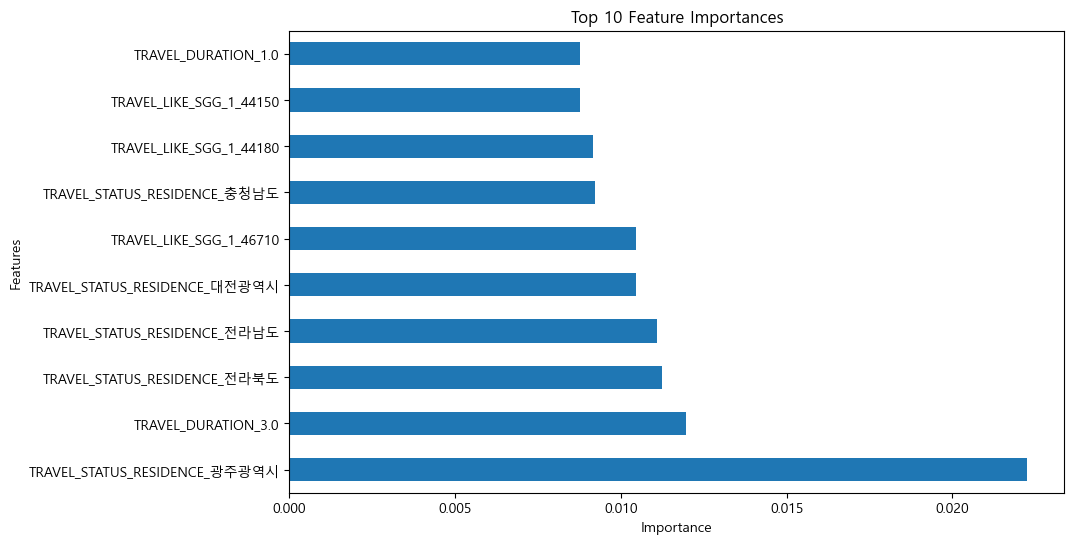

In [20]:
# Feature 중요도 추출 (RandomizedSearchCV에서 학습된 모델 사용)
feature_importances = pd.Series(
    best_xgb_model.feature_importances_,  # random_search.best_estimator_로 학습된 모델 사용
    index=encoder.get_feature_names_out()  # One-Hot Encoding된 Feature 이름 가져오기
)

# 중요도가 높은 상위 10개 Feature 시각화
feature_importances.sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

> 중요도 시각화 : 이건,, 별 의미 없어 보여서 일단 넣어놓긴 했는데 최종 보고서에 안 넣는게 좋을 것 같음!!

<hr>
<h2>[분석 결과 - XGBClassifier]</h2>
<ul>

1. Confusion Matrix 
<ul>
<li>모델이 특정 클래스(여행지)를 다른 클래스로 잘못 예측한 패턴을 파악 가능</li>
<li>자주 혼동되는 지역 간의 차별화된 마케팅 전략 수립 가능 </li>

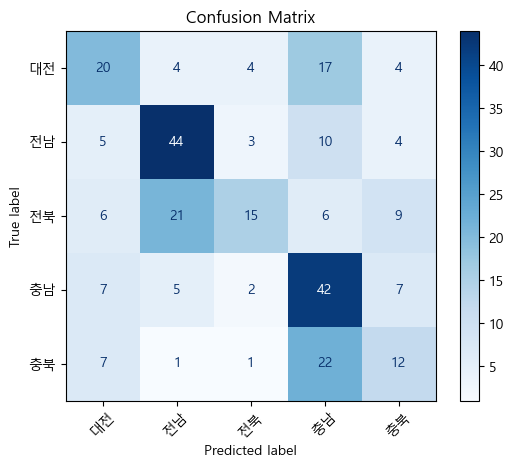

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix 생성
cm = confusion_matrix(y_test_filtered, y_pred, labels=label_encoder.classes_)

# Confusion Matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

> 분석 결과 :
>1) 대전은 17건이 충남으로 잘못 예측되었으므로 대전과 충남 간 혼동 비율이 높음
>2) 전남은 모델의 정확도가 가장 높으므로 혼동할 확률이 낮음
>3) 전북은 전북으로 예측한 건 15건인데, 21건이 전남으로 예측되었으므로 전북과 전남이 가장 많이 혼동된다는 것을 알 수 있음
>4) 충북의 경우도 충북으로 예측한 건 12건인데, 22건이 충남으로 예측되었으므로 충북과 충남이 가장 많이 혼동된다는 것을 알 수 있음

2. 지역별 여행지 선택 분포
<ul>
<li>과대 평가 및 과소 평가 파악 가능</li>

In [22]:
# 지역별 예측된 여행지 분포
region_distribution = pd.DataFrame({
    "Actual": y_test_filtered,
    "Predicted": y_pred
}).groupby("Predicted").size()

print("지역별 예측된 여행지 분포:")
print(region_distribution.sort_values(ascending=False))

지역별 예측된 여행지 분포:
Predicted
충남    97
전남    75
대전    45
충북    36
전북    25
dtype: int64


In [23]:
# 실제 여행지 분포 확인
actual_distribution = pd.DataFrame({
    "Actual": y_test_filtered,
    "Predicted": y_pred
}).groupby("Actual").size()

print("실제 지역별 여행지 분포:")
print(actual_distribution.sort_values(ascending=False))

실제 지역별 여행지 분포:
Actual
전남    66
충남    63
전북    57
대전    49
충북    43
dtype: int64


In [25]:
import pandas as pd

# Actual과 Predicted를 DataFrame으로 생성
comparison = pd.DataFrame({
    "Actual": y_test_filtered,  # 실제 여행지
    "Predicted": y_pred         # 예측된 여행지
})

# Actual과 Predicted의 그룹화 및 개수 계산
actual_counts = comparison.groupby("Actual").size()
predicted_counts = comparison.groupby("Predicted").size()

# Actual과 Predicted를 하나의 DataFrame으로 병합
comparison_summary = pd.DataFrame({
    "Actual_Count": actual_counts,
    "Predicted_Count": predicted_counts
}).fillna(0).astype(int)  # NaN 값은 0으로 채우고 정수로 변환

# 차이 계산 (Actual - Predicted)
comparison_summary["Difference"] = comparison_summary["Predicted_Count"] - comparison_summary["Actual_Count"]

# 결과 출력
print("Actual과 Predicted 비교:")
print(comparison_summary.sort_values(by="Actual_Count", ascending=False))

Actual과 Predicted 비교:
    Actual_Count  Predicted_Count  Difference
전남            66               75           9
충남            63               97          34
전북            57               25         -32
대전            49               45          -4
충북            43               36          -7


> 분석 결과 : 
>1) 전남은 모델이 잘 예측하는 지역 중 하나임
>2) 모델이 충남을 34로 과대평가하므로 충남의 특성이 다른 지역과 혼동될 가능성이 높음
>3) 모델이 전북을 -32로 과소 예측하므로 전북의 특성이 다른 지역과 혼동됨
<br>-> 위의 confusion matirx에서 확인한 것처럼 충북과 충남, 전북과 전남이 많이 혼동된다는 것을 알 수 있음.

3. 시즌별 여행지 선택 분석
<ul>
<li>특정 시즌에 인기가 많은 여행지에 대한 상품 기획 가능</li>


시즌별 예측된 여행지 분포:
Predicted_Destination  대전  전남  전북  충남  충북
SEASON                                   
Autumn                 17  15   6  33   1
Spring                  2  13   7   9   9
Summer                 26  47  12  55  26


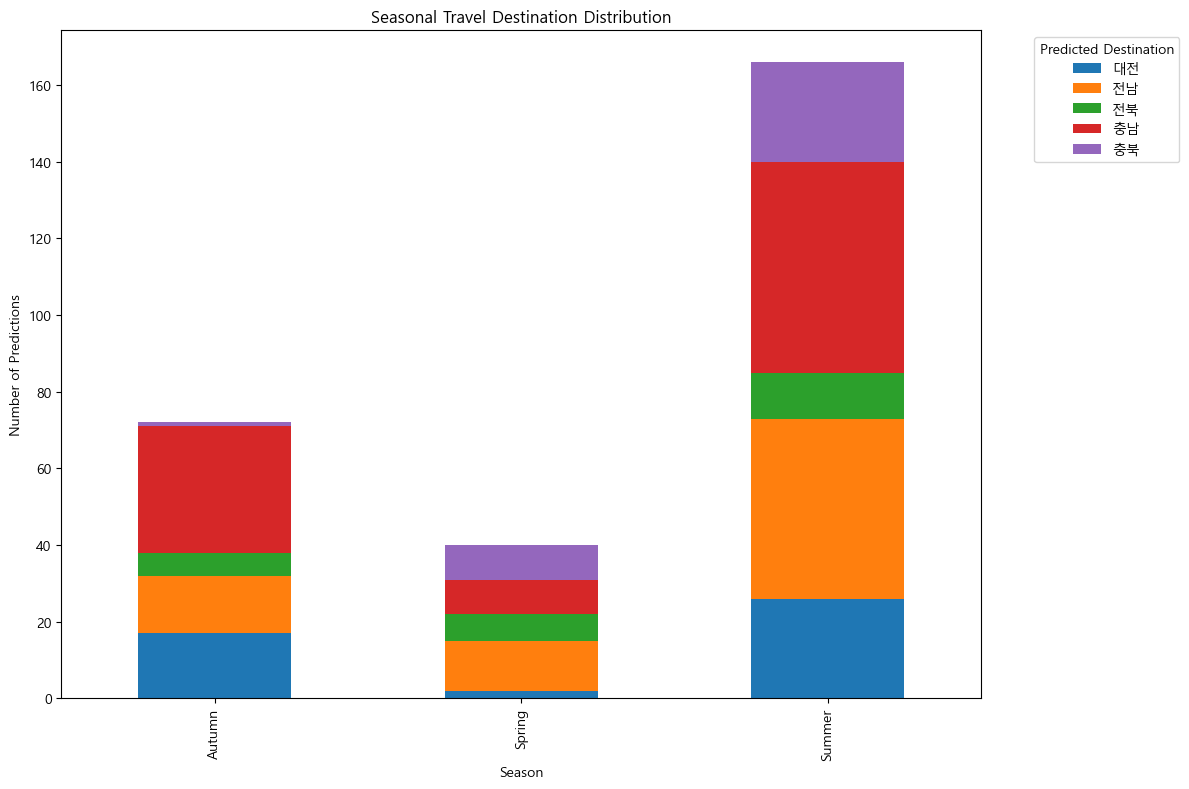

In [24]:
# grouped_test를 y_test_filtered에 맞게 필터링
grouped_test = grouped_test[grouped_test['TRAVEL_STATUS_DESTINATION'].isin(y_test_filtered)].reset_index(drop=True)

# 예측값 추가
grouped_test['Predicted_Destination'] = y_pred

# 시즌별 여행지 선택 분석
season_destination_distribution = grouped_test.groupby(['SEASON', 'Predicted_Destination']).size().unstack(fill_value=0)

print("\n시즌별 예측된 여행지 분포:")
print(season_destination_distribution)

# 시즌별 여행지 선택 시각화
season_destination_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Seasonal Travel Destination Distribution")
plt.xlabel("Season")
plt.ylabel("Number of Predictions")
plt.legend(title="Predicted Destination", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> 분석 결과 : 
>1) 가을은 충남(33건), 대전(17)이 주요 선택지
>2) 봄은 전남(13건)이 주요 선택지
>3) 여름은 충남(55건), 전남(47) 이 주요 선택지이며 다른 지역들도 다른 계절들에 비해서 여름의 비중이 가장 높은 것을 확인할 수 있음.